<a href="https://colab.research.google.com/github/sujay7263/Portfolio_Optimization_Project/blob/main/PORTFOLIO_OPTIMIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimize

Defining the fundamental parameters

In [32]:
NUM_TRADING_DAYS = 252

NUM_PORTFOLIOS = 100000

stocks = [ 'RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS', 'HINDUNILVR.NS', 'LT.NS', 'ITC.NS']

start_date = '2015-01-01'
end_date = '2022-09-30'

Downloading and storing data

In [33]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)
stock_prices

,RELIANCE.NS,HDFCBANK.NS,TCS.NS,HINDUNILVR.NS,LT.NS,ITC.NS
Date,,,,,,
2015-01-01 00:00:00+05:30,381.517303,440.343445,1054.443481,652.363586,856.305298,183.469711
2015-01-02 00:00:00+05:30,380.507568,446.471863,1068.486206,650.213257,874.366455,184.044388
2015-01-05 00:00:00+05:30,376.339600,442.702301,1052.247803,653.954834,886.530701,184.768967
2015-01-06 00:00:00+05:30,359.259583,435.810699,1013.455505,666.340698,856.960571,180.021713
2015-01-07 00:00:00+05:30,367.079895,437.082642,1001.483948,689.735962,854.909546,176.673599
...,...,...,...,...,...,...
2022-09-23 00:00:00+05:30,2236.142578,1410.492920,2844.850830,2598.039795,1821.768555,325.265198
2022-09-26 00:00:00+05:30,2179.173340,1391.473633,2856.632812,2577.213135,1816.470581,312.307190
2022-09-27 00:00:00+05:30,2196.497803,1378.989258,2878.622314,2595.327637,1806.414307,314.419922


Showing price charts for the stocks

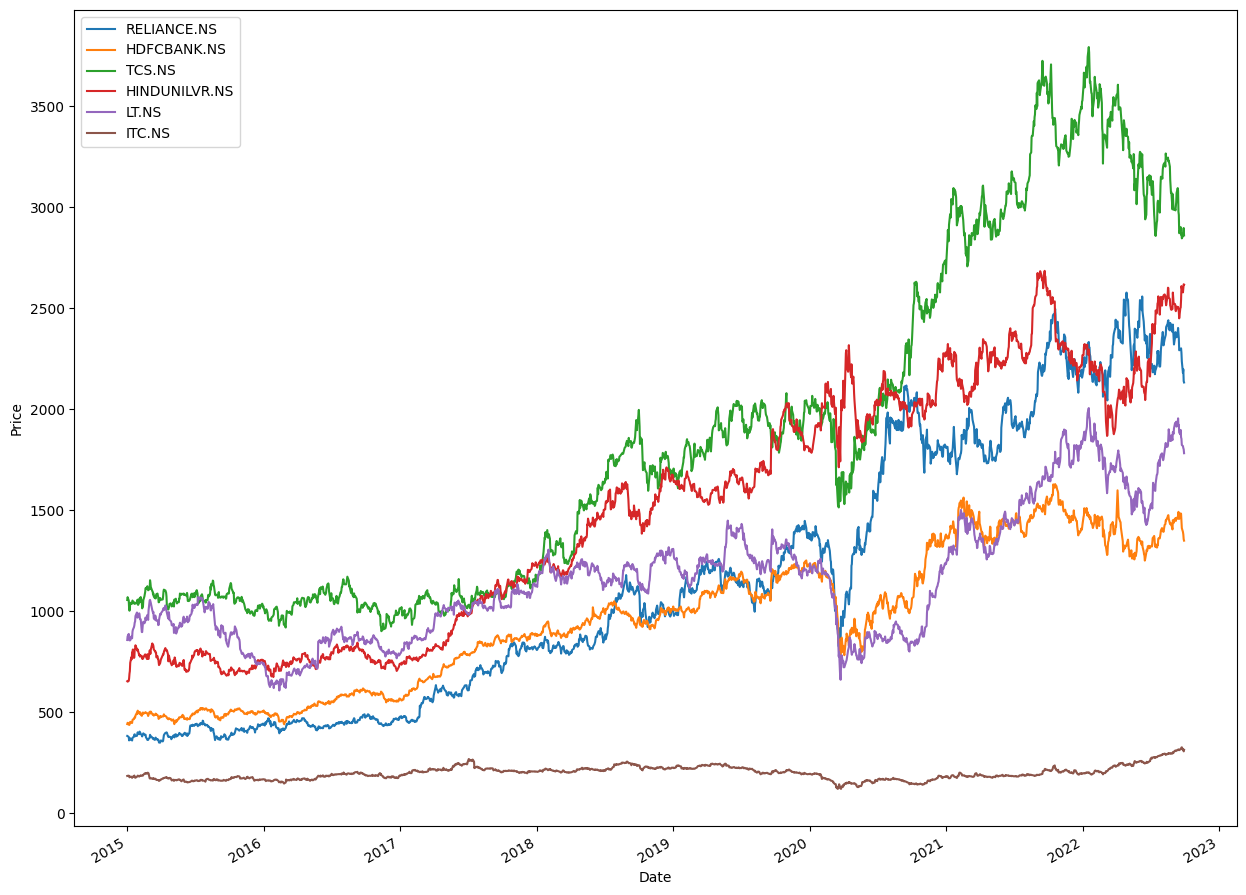

In [34]:
stock_prices.plot(figsize = (15, 12))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Calculating logarithmic daily returns

In [35]:
log_returns = np.log(stock_prices / stock_prices.shift(1))[1:]
log_returns

,RELIANCE.NS,HDFCBANK.NS,TCS.NS,HINDUNILVR.NS,LT.NS,ITC.NS
Date,,,,,,
2015-01-02 00:00:00+05:30,-0.002650,0.013821,0.013230,-0.003302,0.020873,0.003127
2015-01-05 00:00:00+05:30,-0.011014,-0.008479,-0.015314,0.005738,0.013816,0.003929
2015-01-06 00:00:00+05:30,-0.046447,-0.015690,-0.037563,0.018763,-0.033924,-0.026029
2015-01-07 00:00:00+05:30,0.021534,0.002914,-0.011883,0.034508,-0.002396,-0.018774
2015-01-08 00:00:00+05:30,-0.014443,0.020788,0.010738,0.018716,0.006344,0.024724
...,...,...,...,...,...,...
2022-09-23 00:00:00+05:30,-0.018922,-0.027183,-0.008465,-0.003982,-0.016742,0.003905
2022-09-26 00:00:00+05:30,-0.025807,-0.013576,0.004133,-0.008049,-0.002912,-0.040654
2022-09-27 00:00:00+05:30,0.007919,-0.009013,0.007668,0.007004,-0.005552,0.006742


Statistics of the stocks

In [36]:
print('*** NET RETURNS ON THE STOCKS ***')
print(log_returns.mean() * NUM_TRADING_DAYS)
print()
print('*** VOLATILITY OF THE STOCKS ***')
print(np.sqrt(log_returns.var() * NUM_TRADING_DAYS))

*** NET RETURNS ON THE STOCKS ***
RELIANCE.NS      0.226748
HDFCBANK.NS      0.147486
TCS.NS           0.131483
HINDUNILVR.NS    0.183041
LT.NS            0.096532
ITC.NS           0.070287
dtype: float64

*** VOLATILITY OF THE STOCKS ***
RELIANCE.NS      0.295569
HDFCBANK.NS      0.234880
TCS.NS           0.245763
HINDUNILVR.NS    0.234850
LT.NS            0.279226
ITC.NS           0.269837
dtype: float64


Simulating portfolios

In [37]:
portfolio_means = []
portfolio_risks = []
portfolio_weights = []

for _ in range(NUM_PORTFOLIOS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    portfolio_means.append(np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS)
    portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w))))

weights = np.array(portfolio_weights)
returns = np.array(portfolio_means)
risks = np.array(portfolio_risks)

portfolios = pd.DataFrame({'Return': returns, 'Risk': risks, 'Sharpe Ratio': returns/risks})
portfolios

,Return,Risk,Sharpe Ratio
0,0.151320,0.176434,0.857659
1,0.155093,0.171195,0.905946
2,0.145378,0.177740,0.817920
3,0.119149,0.178905,0.665990
4,0.163772,0.175506,0.933143
...,...,...,...
99995,0.152321,0.174183,0.874483
99996,0.162558,0.177061,0.918088
99997,0.131611,0.167437,0.786034
99998,0.149566,0.194700,0.768185


Plotting the portfolios

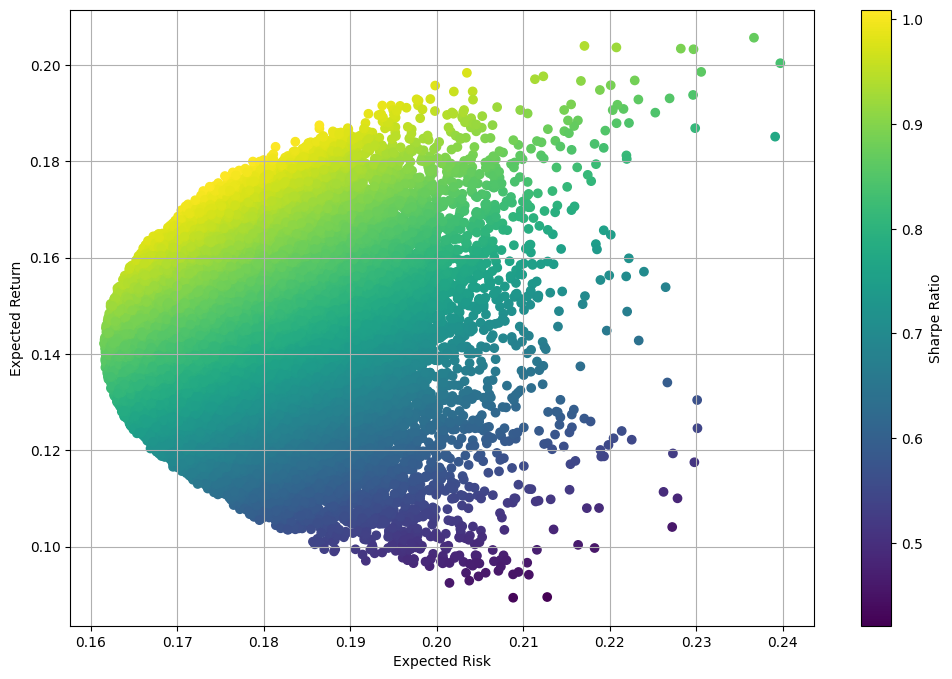

In [38]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.show()

Finding optimal portfolio (maximum Sharpe Ratio)

In [39]:
sharpe_ratios = returns / risks
index = 0

for i in range(len(sharpe_ratios)):
    if sharpe_ratios[i] == np.amax(sharpe_ratios):
        index = i

print("The optimal portfolio has a Sharpe Ratio: ", sharpe_ratios[index].round(5))
print()

print("Expected Return: ", returns[index].round(5))
print("Expected Volatility: ", risks[index].round(5))
print()

print("Weights to be allotted to the stocks:")

for i in range(len(stocks)):
    print(stocks[i],':', weights[index][i].round(5))

The optimal portfolio has a Sharpe Ratio:  1.00924

Expected Return:  0.18302
Expected Volatility:  0.18135

Weights to be allotted to the stocks:
RELIANCE.NS : 0.3178
HDFCBANK.NS : 0.12647
TCS.NS : 0.15842
HINDUNILVR.NS : 0.38388
LT.NS : 0.01026
ITC.NS : 0.00318


Plotting Optimal Portfolio

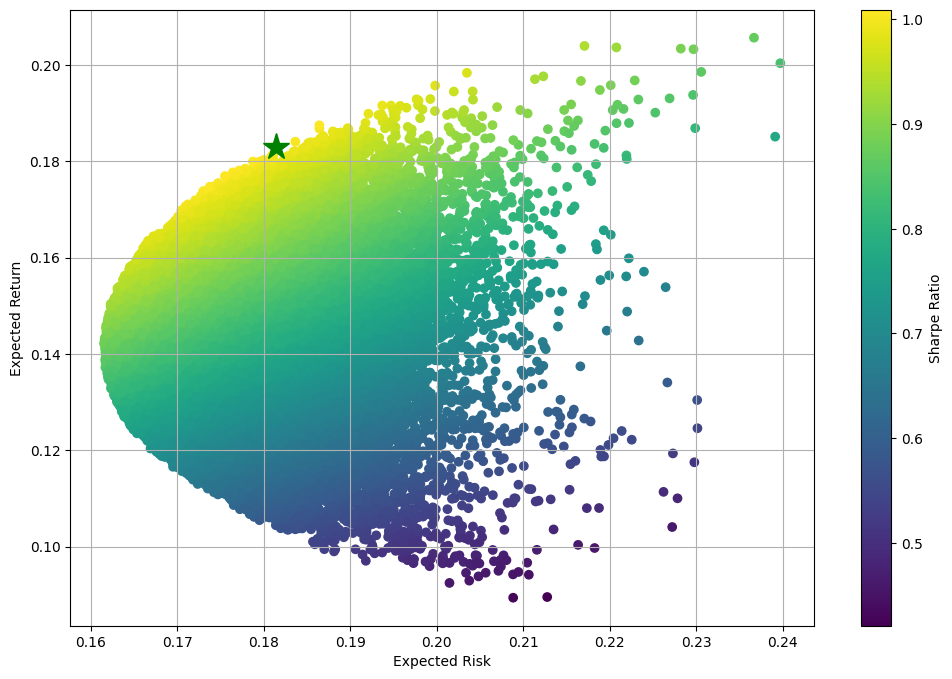

In [40]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(risks[index], returns[index], 'g*', markersize = 20.0)

Minimum Variance Portfolio

In [41]:
index1 = 0

for i in range(len(risks)):
    if risks[i] == np.amin(risks):
        index1 = i

print("The minimum variance portfolio has a Sharpe Ratio: ", sharpe_ratios[index1].round(5))
print()

print("Expected Return: ", returns[index1].round(5))
print("Expected Volatility: ", risks[index1].round(5))
print()

print("Weights to be allotted to the stocks:")

for i in range(len(stocks)):
    print(stocks[i],':', weights[index1][i].round(5))

The minimum variance portfolio has a Sharpe Ratio:  0.88036

Expected Return:  0.14218
Expected Volatility:  0.16151

Weights to be allotted to the stocks:
RELIANCE.NS : 0.05914
HDFCBANK.NS : 0.19839
TCS.NS : 0.2496
HINDUNILVR.NS : 0.26888
LT.NS : 0.0662
ITC.NS : 0.15779



Plotting Minimum Variance Portfolio

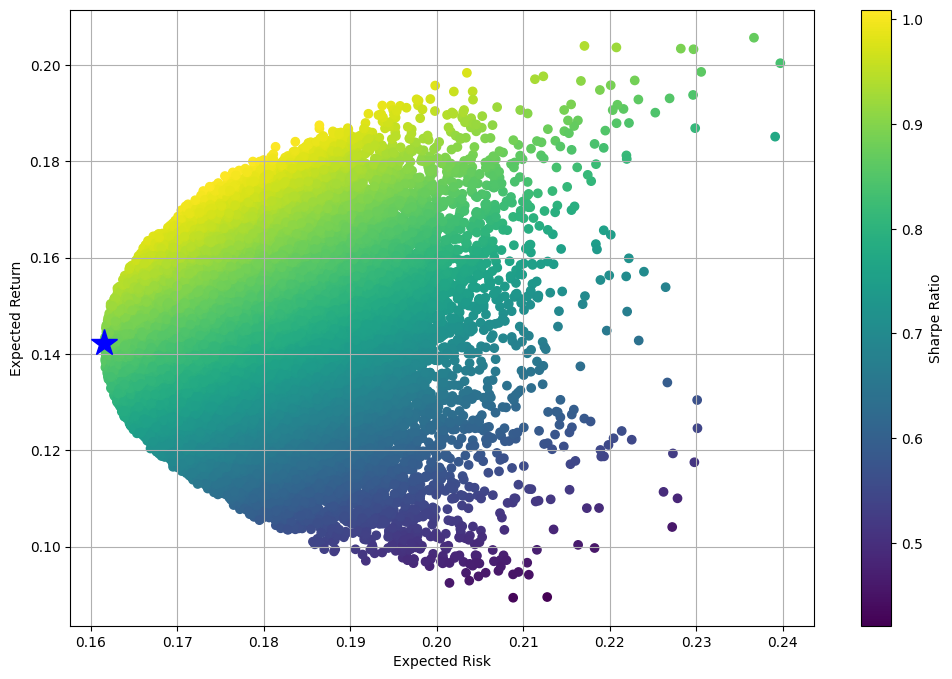

In [42]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(risks[index1], returns[index1], 'b*', markersize = 20.0)